<a href="https://colab.research.google.com/github/BKover99/Pseudovisium/blob/main/Brain_datasets_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/BKover99/Pseudovisium/raw/main/Datasets_all.xlsx
!pip install Pseudovisium -q --upgrade
!pip install pympler -q
!pip install harmonypy -q
!pip install spatialAUC -q

--2024-06-07 10:40:09--  https://github.com/BKover99/Pseudovisium/raw/main/Datasets_all.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BKover99/Pseudovisium/main/Datasets_all.xlsx [following]
--2024-06-07 10:40:09--  https://raw.githubusercontent.com/BKover99/Pseudovisium/main/Datasets_all.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37607 (37K) [application/octet-stream]
Saving to: ‘Datasets_all.xlsx’

Datasets_all.xlsx   100%[===================>]  36.73K  --.-KB/s    in 0.04s   

2024-06-07 10:40:10 (931 KB/s) - ‘Datasets_all.xlsx’ saved [37607/37607]

  Preparing metadata (se

In [ ]:
import pandas as pd
from os import system
#from Pseudovisium.pseudovisium_generate import generate_pv
import os
import time


import squidpy as sq
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from pympler import asizeof
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as metrics
import shutil
import subprocess
import concurrent.futures
# Set the random seed
np.random.seed(42)

def find_csv_with_transcript(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if ((file.endswith('.csv') or file.endswith('.csv.gz')) and (('transcript' in file.lower() or 'tx' in file.lower()))) and 'macosx' not in root.lower():
                return os.path.join(root, file)
    return None

def find_any_file_within_folder(folder_path,end):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            #if (file.endswith(end) or file.endswith(end+"") and 'macosx' not in root.lower():
            if (file.endswith(end) or file.endswith(end+".gz")) and 'macosx' not in root.lower():
                return os.path.join(root, file)
    return None

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


In [ ]:
datasets = pd.read_excel("/content/Datasets_all.xlsx")
datasets_to_use = datasets[datasets["Dataset_merge_visium"]==1]
#remove those without link
datasets_to_use = datasets_to_use[~datasets_to_use["Onedrive_link"].isna()]
datasets_to_use.reset_index(drop=True,inplace=True)
datasets_to_use

,Author,Year,Paper_DOI,Link_to_dataset,Onedrive_link,Name,Technology,Tissue,Species,Visium_xenium_notebook,Allen_Brain_Merfish,PV_workflow_comparison,Comparing_all_tech,Pulmonary Xenium,Cosmx_lung,Dataset_merge_visium,Brain case study,Just Visium example
0,Nanostring,2023.0,NaN,https://nanostring.com/products/cosmx-spatial-...,https://ywobqw.bl.files.1drv.com/y4mnkgdMt9PQD...,CosMx_mouse_brain,CosMx,Brain,Mouse,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN
1,10X,2023.0,NaN,NaN,https://cf.10xgenomics.com/samples/xenium/1.4....,Xenium_brain_1,Xenium,Brain,Mouse,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN
2,Spatial genomics,2024.0,NaN,https://www.10xgenomics.com/datasets/visium-hd...,https://kqaaxa.bl.files.1drv.com/y4m1vncufYYbE...,Visium_HD_brain_2um,Visium_HD,Brain_2um,Mouse,NaN,NaN,1.0,1.0,NaN,0.0,1.0,NaN,NaN
3,10X,NaN,NaN,https://console.cloud.google.com/storage/brows...,https://b21bqa.bl.files.1drv.com/y4mNMd6UYwK_V...,Vizgen_brain_2_1,Vizgen,Brain,NaN,NaN,NaN,1.0,1.0,NaN,0.0,1.0,NaN,NaN
4,Wu et al.,2024.0,https://doi.org/10.1111/acel.14109,GSM5773453,https://jcgr5w.bl.files.1drv.com/y4mdpOjO3J91P...,Visium_GSM5773453,Visium,Brain,Mouse,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0
5,Wu et al.,2024.0,https://doi.org/10.1111/acel.14109,GSM5773457,https://kd25iq.bl.files.1drv.com/y4m0bQ8gUOcrd...,Visium_GSM5773457,Visium,Brain,Mouse,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0


In [ ]:
def download_and_unzip(dataset):
    try:
        download_link = dataset["Onedrive_link"]
        name = dataset["Name"]
        print(f"Processing dataset: {name}")
        print(f"Download link: {download_link}")

        command = "wget {}".format(download_link)
        subprocess.run(command, shell=True, check=True)

        filename = download_link.split("com/")[-1]
        archive_name = filename.split("/")[-1]

        if name == "Xenium_whole_mouse_pup":
            filename = "Xenium_V1_mouse_pup_outs.zip"

        try:
            command_unzip = "unzip -d /content/{} /content/{}".format(name, filename)
            print(command_unzip)
            subprocess.run(command_unzip, shell=True, check=True)
            print("Successfully unzipped {}.".format(archive_name))
            os.remove("/content/{}".format(filename))  # Remove the zip file
        except subprocess.CalledProcessError:
            print("Failed to unzip {}. Attempting other methods.".format(archive_name))

            try:
                command_gunzip = "gunzip -d /content/{} /content/{}".format(name, filename)
                subprocess.run(command_gunzip, shell=True, check=True)
                print("Successfully gunzipped {}.".format(archive_name))
                os.remove("/content/{}".format(filename))   # Remove the zip file
            except subprocess.CalledProcessError:
                print("Failed to gunzip {}. Attempting other methods.".format(archive_name))

                try:
                    os.makedirs("/content/{}".format(name), exist_ok=True)
                    command_untar = "tar -xvf /content/{} -C /content/{}".format(filename, name)
                    subprocess.run(command_untar, shell=True, check=True)
                    print("Successfully untarred {}.".format(archive_name))
                    os.remove("/content/{}".format(filename))   # Remove the zip file
                except subprocess.CalledProcessError:
                    try:

                      command_untar = "tar -xvzf /content/{} -C /content/{}".format(filename, name)
                      subprocess.run(command_untar, shell=True, check=True)
                      print("Successfully untarred {}.".format(archive_name))
                      os.remove("/content/{}".format(filename))   # Remove the zip file
                    except:
                      print("All methods failed to extract {}.".format(archive_name))

    except KeyError as e:
        print(f"Error: Missing required column in dataset: {str(e)}")
    except subprocess.CalledProcessError as e:
        print(f"Error: Command failed: {str(e)}")
    except Exception as e:
        print(f"Error: An unexpected error occurred: {str(e)}")

# Create a thread pool with a maximum of 10 threads
with concurrent.futures.ThreadPoolExecutor(max_workers=16) as executor:
    # Submit download and unzip tasks to the thread pool
    futures = [executor.submit(download_and_unzip, row.to_dict()) for _, row in datasets_to_use.reset_index(drop=True).iterrows()]

    # Wait for all tasks to complete
    concurrent.futures.wait(futures)


Processing dataset: CosMx_mouse_brain
Download link: https://ywobqw.bl.files.1drv.com/y4mnkgdMt9PQDjy_KeoASubj2GkF8Ro0xggVKMegwWL2EqBQaVXMq6-28emVeQKpe0pY0vf-ZaMWUR1jhZTcg555duknK_p6Se7HsxcI7b3UdOPpNAQLS7_XUQ9lK2T4IIfsfLe4wGjlWPXkp5Jb0LL9z23hgY32LnPowmzrS585zsjjDLKCZBLP6-lyhTHfG3ug-xMX8wGjNb2GWaUYXJzYQ
Processing dataset: Xenium_brain_1
Download link: https://cf.10xgenomics.com/samples/xenium/1.4.0/Xenium_V1_FFPE_wildtype_13_4_months/Xenium_V1_FFPE_wildtype_13_4_months_outs.zip
Processing dataset: Visium_HD_brain_2um
Download link: https://kqaaxa.bl.files.1drv.com/y4m1vncufYYbEWZeyFeKzMMc4HwleEa84uMsxq5y0Nz-u0CTrcKxavxG-b8Rt4kUUaBIWhhdnOHewUUs_45YDFWu89PZTazp1uZ6XF-lVWq18jc-fE37Tf_4JOk11oQPYwnQt18hM2TivzFar_ZspH8VhxPGnpAps_AROgOtDeA6ysgso-HAKQ9HoA4uwrxbkAs-auxb_46FMs4cARZR-r9iQ
Processing dataset: Vizgen_brain_2_1
Download link: https://b21bqa.bl.files.1drv.com/y4mNMd6UYwK_VG-Q2up-A5uD3CG9TYQbedoNHVBcAPCgClbcHU6sd_u8Eg2zrodi_UCnBXawvrevCXFbv9MncmxkeJFiiLilTPsR_1eCWQ__F5--C4YrucktJ06d6t

In [ ]:
!unzip /content/Xenium_V1_FFPE_wildtype_13_4_months_outs.zip -d /content/Xenium_brain_1

Archive:  /content/Xenium_V1_FFPE_wildtype_13_4_months_outs.zip
  inflating: /content/Xenium_brain_1/analysis_summary.html  
 extracting: /content/Xenium_brain_1/analysis.zarr.zip  
  inflating: /content/Xenium_brain_1/cell_boundaries.csv.gz  
  inflating: /content/Xenium_brain_1/cell_boundaries.parquet  
  inflating: /content/Xenium_brain_1/cell_feature_matrix.h5  
 extracting: /content/Xenium_brain_1/cell_feature_matrix.zarr.zip  
  inflating: /content/Xenium_brain_1/cells.csv.gz  
  inflating: /content/Xenium_brain_1/cells.parquet  
 extracting: /content/Xenium_brain_1/cells.zarr.zip  
  inflating: /content/Xenium_brain_1/experiment.xenium  
  inflating: /content/Xenium_brain_1/gene_panel.json  
  inflating: /content/Xenium_brain_1/metrics_summary.csv  
  inflating: /content/Xenium_brain_1/morphology_focus.ome.tif  
  inflating: /content/Xenium_brain_1/morphology_mip.ome.tif  
  inflating: /content/Xenium_brain_1/morphology.ome.tif  
  inflating: /content/Xenium_brain_1/nucleus_boun

In [ ]:
from Pseudovisium.pseudovisium_generate import generate_pv
#from pseudovisium_generate import generate_pv

In [ ]:
output_path="/content/"
hexagon_size=50
max_workers=10
errors=[]
for i in range(len(datasets_to_use)):
    try:
      start_pv = time.time()
      technology = datasets_to_use["Technology"].values[i]
      if technology != "CosMx" and technology != "Visium_HD":
        continue


      name=datasets_to_use["Name"].values[i]
      img_file_path=None
      if technology != "Visium_HD" and technology != "Curio":
        csv_file = find_csv_with_transcript("/content/"+name+"/")
        print(csv_file)
        visium_hd_folder=None
      elif technology == "Visium_HD":
        csv_file = None
        img_file_path = "/content/Visium_HD_brain_2um/square_002um_mouse_brain/spatial/tissue_hires_image.png"
        visium_hd_folder = find_any_file_within_folder("/content/"+name+"/","filtered_feature_bc_matrix.h5").split("filtered_feature_bc_matrix.h5")[0]
      elif technology == "Curio":
        visium_hd_folder = find_any_file_within_folder("/content/"+name+"/","h5ad").split("Puck")[0]

      if technology == "CosMx":
      #getting unique cell names for old SMI data
        df = pd.read_csv(csv_file)

        # Create a new column called 'cell' by concatenating 'fov' and 'cell_ID' columns
        df['cell'] = df['fov'].astype(str) + '_' + df['cell_ID'].astype(str)

        # Save the updated DataFrame back to the original CSV file
        df.to_csv(csv_file, index=False)
        technology = "CosMx"

      print(technology)
      print(visium_hd_folder)

      quality_filter = True if technology=="Xenium" else False
      ctu= 0.12028 if technology=="CosMx" else 1
      print(ctu)

      generate_pv(csv_file=csv_file,
                  visium_hd_folder=visium_hd_folder,
                  hexagon_size=hexagon_size,
                  output_path=output_path,
                  img_file_path=img_file_path,
                  batch_size=10000000,
                  technology=technology,
                  max_workers=max_workers,
                  quality_filter=quality_filter,
                  project_name=name,
                  coord_to_um_conversion=ctu,
                  shift_to_positive=True)


      end_pv = time.time()
      time_pv = end_pv-start_pv
      results[name]={}
      results[name]["time_pv"]=time_pv
      print(results)
    except:
      errors.append(name)
      print(errors)

/content/CosMx_mouse_brain/mouse brain parts/Brain_files/Run1000_S1_Half_tx_file.csv


<ipython-input-24-82877d121daa>:28: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


CosMx
None
0.12028
You are using version:  ['Pseudovisium==0.0.39']
Date:  2024-06-07
Technology is Nanostring. Going forward with default column names.
Quality filter is set to False
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tmp_hexaoxzlzjfr
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Created batch 11
Created batch 12
Finished preprocessing. Total batches created: 12
Processing batches using 8 processes


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing batches: 100%|██████████| 12/12 [03:57<00:00, 19.78s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/CosMx_mouse_brain
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 116159827.0
Number of unique hexagons: 4062
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 938.3954083919525 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
['CosMx_mouse_brain']
Visium_HD
/content/Visium_HD_brain_2um/square_002um_mouse_brain/
1
You are using version:  ['Pseudovisium==0.0.39']
Date:  2024-06-07
Technology is Visium_HD. Generating transcripts.csv file from Visium HD files.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Technology is Visium_HD. Going forward with pseudovisium processed colnames.
Quality filter is set to False
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tmp_hexa9gjq26xd
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Finished preprocessing. Total batches created: 9
Processing batches using 8 processes


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing batches: 100%|██████████| 9/9 [04:56<00:00, 32.97s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/Visium_HD_brain_2um
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 88708295.0
Number of unique hexagons: 3053
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
Image provided at /content/Visium_HD_brain_2um/square_002um_mouse_brain/spatial/tissue_hires_image.png
Creating tissue_hires_image.png file in spatial folder.
Creating arguments.json file in output path.
Time taken: 1203.2933382987976 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
['CosMx_mouse_brain', 'Visium_HD_brain_2um']


In [ ]:
import squidpy as sq

In [ ]:
from Pseudovisium.pseudovisium_merge import merge_visium
# Define the folders and output path
folders = ["/content/Visium_GSM5773453/GSM5773453/GSM5773453_Young_mouse_brain_A1-1/",
           "/content/Visium_GSM5773457/GSM5773457/GSM5773457_Old_mouse_brain_A1-2/",
           "/content/pseudovisium/Visium_HD_brain_2um/",
           "/content/pseudovisium/CosMx_mouse_brain/",
           ]
output_path = "/content/"

merge_visium(folders, output_path, "merged", pv_format=False,only_common=True)



You are using version:  ['Pseudovisium==0.0.39']
Date:  2024-06-07
Loading in GSM5773453_Young_mouse_brain_A1-1
Loading in GSM5773457_Old_mouse_brain_A1-2
Loading in Visium_HD_brain_2um
Loading in CosMx_mouse_brain
Number of genes present in all datasets: 929
GSM5773453_Young_mouse_brain_A1-1
n_barcodes_before 3259
GSM5773457_Old_mouse_brain_A1-2
n_barcodes_before 6940
Visium_HD_brain_2um
n_barcodes_before 9993
CosMx_mouse_brain
n_barcodes_before 14055
0
1
2
3


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_merge.py:336: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_tissue_positions_list = pd.concat([new_tissue_positions_list,tissue_positions_list_to_add])


Generating barcodes.tsv.gz
Generating matrix.mtx.gz
matrix_head before writing out    Gene_ID  Barcode_ID  Counts
0        1           2     3.0
1        1           3     6.0
2        1           4     5.0
3        1           5     4.0
4        1           6    12.0
Generating filtered_feature_bc_matrix.h5
  (2, 0)	3.0
  (3, 0)	4.0
  (4, 0)	6.0
  (5, 0)	5.0
  (6, 0)	8.0
  (7, 0)	3.0
  (8, 0)	5.0
  (9, 0)	9.0
  (10, 0)	6.0
  (11, 0)	3.0
  (12, 0)	2.0
  (13, 0)	1.0
  (14, 0)	3.0
  (15, 0)	6.0
  (16, 0)	3.0
  (17, 0)	2.0
  (18, 0)	5.0
  (19, 0)	5.0
  (20, 0)	3.0
  (21, 0)	7.0
  (22, 0)	9.0
  (23, 0)	1.0
  (24, 0)	4.0
  (25, 0)	4.0
  (26, 0)	2.0
  :	:
  (14026, 928)	124.0
  (14027, 928)	23.0
  (14028, 928)	23.0
  (14029, 928)	3.0
  (14030, 928)	184.0
  (14032, 928)	95.0
  (14033, 928)	13.0
  (14034, 928)	10.0
  (14035, 928)	17.0
  (14036, 928)	159.0
  (14037, 928)	3.0
  (14038, 928)	21.0
  (14039, 928)	24.0
  (14040, 928)	242.0
  (14041, 928)	17.0
  (14042, 928)	25.0
  (14043, 928)	40.0


In [ ]:
import squidpy as sq
import scanpy as sc
import numpy as np
import scanpy.external as sce
adata = sq.read.visium("/content/pseudovisium/merged",library_id="library")
adata.obs["sum"]=adata.X.sum(axis=1)
adata.obs["logsum"]=np.log10(adata.X.sum(axis=1))
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sq.gr.spatial_neighbors(adata, radius=250, coord_type="generic", delaunay=True)
indices = adata.obs.index
adata.obs['dataset'] = np.where(indices.str.contains('CosMx'), 'CosMx',
                                np.where(indices.str.contains('HD'), 'Visium HD', 'Visium'))

In [ ]:
adata_visium = adata[adata.obs["dataset"]=="Visium"]
sq.gr.spatial_autocorr(adata_visium, mode="moran", n_perms=100, n_jobs=4)
genes_visium = adata_visium.uns["moranI"][:500].index.values

adata_cosmx = adata[adata.obs["dataset"]=="CosMx"]
sq.gr.spatial_autocorr(adata_cosmx, mode="moran", n_perms=100, n_jobs=4)
genes_cosmx = adata_cosmx.uns["moranI"][:500].index.values

adata_hd = adata[adata.obs["dataset"]=="Visium HD"]
sq.gr.spatial_autocorr(adata_hd, mode="moran", n_perms=100, n_jobs=4)
genes_hd = adata_hd.uns["moranI"][:500].index.values

# Find the overlap between the three arrays
common_genes = np.intersect1d(genes_visium, np.intersect1d(genes_cosmx, genes_hd))

# Print the common genes
print("First 10 common genes:", common_genes[:10])


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 8 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?/s]

/usr/local/lib/python3.10/dist-packages/squidpy/gr/_utils.py:194: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  obj[key] = data


  0%|          | 0/100 [00:00<?, ?/s]

/usr/local/lib/python3.10/dist-packages/squidpy/gr/_utils.py:194: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  obj[key] = data


  0%|          | 0/100 [00:00<?, ?/s]

First 10 common genes: ['ABCA2' 'ABI2' 'ADAM22' 'ADAR' 'ADCY1' 'ADCY2' 'ADGRL2' 'ADORA1'
 'ADORA2A' 'AGT']


/usr/local/lib/python3.10/dist-packages/squidpy/gr/_utils.py:194: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  obj[key] = data


In [ ]:
# Create a boolean mask for common genes in adata.var.index
mask = adata.var.index.isin(common_genes)

# Subset the adata object to keep only the common genes
adata_common = adata[:, mask]

# Print the shape of the subsetted adata
print("Shape of subsetted adata:", adata_common.shape)

Shape of subsetted adata: (14052, 357)


In [ ]:
sc.pp.scale(adata_common)
sc.pp.pca(adata_common)
sce.pp.harmony_integrate(adata_common, 'dataset',max_iter_harmony=30, plot_convergence=True)
adata_common.obsm['X_pca'] = adata_common.obsm['X_pca_harmony']
sc.pp.neighbors(adata_common, n_neighbors=30, n_pcs=20)
sc.tl.leiden(adata_common, resolution=0.5, key_added="leiden",flavor='igraph')


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_scale.py:299: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
2024-06-07 13:53:11,226 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-06-07 13:53:13,699 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-06-07 13:53:13,760 - harmonypy - INFO - Iteration 1 of 30
INFO:harmonypy:Iteration 1 of 30
2024-06-07 13:53:16,794 - harmonypy - INFO - Iteration 2 of 30
INFO:harmonypy:Iteration 2 of 30
2024-06-07 13:53:20,147 - harmonypy - INFO - Iteration 3 of 30
INFO:harmonypy:Iteration 3 of 30
2024-06-07 13:53:23,608 - harmonypy - INFO - Iteration 4 of 30
INFO:harmonypy:Iteration 4 of 30
2024-06-07 13:53:27,053 - harmonypy - INFO - Iteration 5 of 30
INFO:harmonypy:Iteration 5 of 30
2024-06-07 13:53:29,918 - harmonypy - INFO - Iteration 6 of

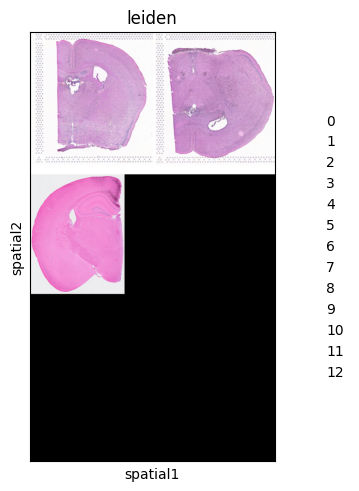

In [ ]:
sq.pl.spatial_scatter(adata_common, color="leiden",img=True,alpha=0.0)
plt.savefig("tissue.svg")
plt.savefig("tissue.png")

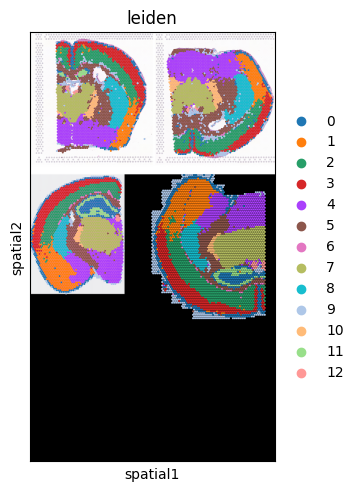

In [ ]:
sq.pl.spatial_scatter(adata_common, color="leiden",img=True)
plt.savefig("leiden.svg")
plt.savefig("leiden.png")

In [ ]:
from spatialAUC.spatialAUC import get_df_from_gmt, get_auc
adata_common.var.index = [gene.capitalize() for gene in adata_common.var.index]
genes = list(set(adata_common.var_names) & set(adata_common.var_names))

df = get_df_from_gmt(['m5.all', 'm2.all'],'2023.1.Mm', genes,min_gene_ratio=0.3, min_gene_count=5)

new_adata_pv = get_auc(adata_common, df, axis=0)
new_adata_pv.obsm["spatial"]=adata_common.obsm["spatial"]
new_adata_pv.uns["spatial"]=adata_common.uns["spatial"]

/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]
/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:72: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]


In [ ]:
sq.gr.spatial_autocorr(new_adata_pv, mode="moran", n_perms=100, n_jobs=4)
new_adata_pv.uns["moranI"]


  0%|          | 0/100 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
REACTOME_TRAFFICKING_OF_AMPA_RECEPTORS,0.788204,0.0,0.000024,0.0,0.009901,0.000048,0.0,0.0,0.009901
GOBP_LIGAND_GATED_ION_CHANNEL_SIGNALING_PATHWAY,0.785119,0.0,0.000024,0.0,0.009901,0.000067,0.0,0.0,0.009901
REACTOME_UNBLOCKING_OF_NMDA_RECEPTORS_GLUTAMATE_BINDING_AND_ACTIVATION,0.774268,0.0,0.000024,0.0,0.009901,0.000054,0.0,0.0,0.009901
REACTOME_ACTIVATION_OF_NMDA_RECEPTORS_AND_POSTSYNAPTIC_EVENTS,0.763602,0.0,0.000024,0.0,0.009901,0.000055,0.0,0.0,0.009901
GOBP_GLUTAMATE_RECEPTOR_SIGNALING_PATHWAY,0.742966,0.0,0.000024,0.0,0.009901,0.000056,0.0,0.0,0.009901
GOBP_IONOTROPIC_GLUTAMATE_RECEPTOR_SIGNALING_PATHWAY,0.737118,0.0,0.000024,0.0,0.009901,0.000064,0.0,0.0,0.009901
GOCC_CYTOSOLIC_REGION,0.723435,0.0,0.000024,0.0,0.009901,0.000054,0.0,0.0,0.009901
REACTOME_PLATELET_CALCIUM_HOMEOSTASIS,0.722927,0.0,0.000024,0.0,0.009901,0.000057,0.0,0.0,0.009901
REACTOME_GLUTAMATE_NEUROTRANSMITTER_RELEASE_CYCLE,0.721869,0.0,0.000024,0.0,0.009901,0.000052,0.0,0.0,0.009901
GOCC_RIBBON_SYNAPSE,0.712614,0.0,0.000024,0.0,0.009901,0.000054,0.0,0.0,0.009901


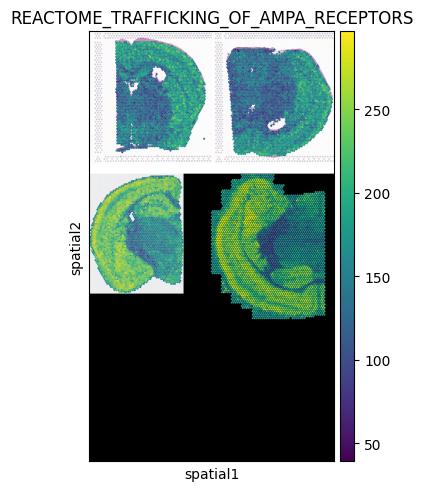

In [ ]:
sq.pl.spatial_scatter(new_adata_pv, color="REACTOME_TRAFFICKING_OF_AMPA_RECEPTORS",img=True)
plt.savefig("gsea.svg")
plt.savefig("gsea.png")

In [ ]:
sq.gr.spatial_autocorr(adata_common, mode="moran", n_perms=100, n_jobs=4)
adata_common.uns["moranI"]
plt.savefig("mbp.svg")
plt.savefig("mbp.png")

  0%|          | 0/100 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


<Figure size 640x480 with 0 Axes>

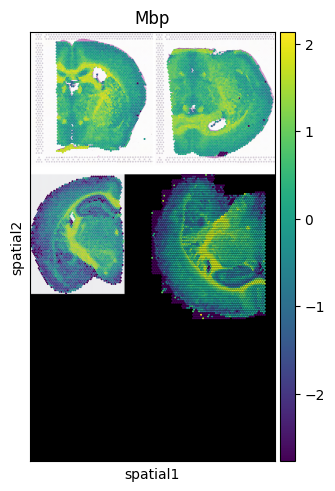

In [ ]:
sq.pl.spatial_scatter(adata_common, color="Mbp",img=True)